In [1]:
# imports
import pandas as pd
import numpy as np
import sys 
sys.path.append('..')
sys.path.append('../src')

from DataHandling.loading import DataLoader as DL
from DataHandling import visualization as vis
from DataHandling import processing as proc

In [2]:
TURBINE_ID_BRITISH = 2  ### set turbine id you would like to inspect
TURBINE_ID_BRAZILIAN = 1 ### set turbine id you would like to inspect

turbine_brit = DL.load_data(turbine_id=TURBINE_ID_BRITISH, which_data="British")
turbine_braz = DL.load_data(turbine_id=TURBINE_ID_BRAZILIAN, which_data="Brazilian")

In [3]:
# eliminate columns with over 50% NaNs
turbine_brit.dropna(axis=1, thresh=int(0.5*len(turbine_brit)), inplace=True)

## Feature Selection

- very important step
- properties: same features for brazilian and british data set, physical meaningful variables, not to many to consider occams razor

- wanna include time somehow to capture seasonal, daily aspects


In [4]:
for key in turbine_brit.keys():
    print(key)

Wind speed (m/s)
Wind speed, Standard deviation (m/s)
Wind speed, Minimum (m/s)
Wind speed, Maximum (m/s)
Long Term Wind (m/s)
Wind speed Sensor 1 (m/s)
Wind speed Sensor 1, Standard deviation (m/s)
Wind speed Sensor 1, Minimum (m/s)
Wind speed Sensor 1, Maximum (m/s)
Wind speed Sensor 2 (m/s)
Wind speed Sensor 2, Standard deviation (m/s)
Wind speed Sensor 2, Minimum (m/s)
Wind speed Sensor 2, Maximum (m/s)
Density adjusted wind speed (m/s)
Wind direction (°)
Nacelle position (°)
Wind direction, Standard deviation (°)
Wind direction, Minimum (°)
Wind direction, Maximum (°)
Nacelle position, Standard deviation (°)
Nacelle position, Minimum (°)
Nacelle position, Maximum (°)
Vane position 1+2 (°)
Energy Export (kWh)
Energy Export counter (kWh)
Energy Import (kWh)
Lost Production (Contractual) (kWh)
Lost Production (Time-based IEC B.2.2) (kWh)
Lost Production (Time-based IEC B.2.3) (kWh)
Lost Production (Time-based IEC B.2.4) (kWh)
Lost Production (Time-based IEC B.3.2) (kWh)
Lost Producti

We do not have a encoded the time as a feature yet. Let's change this:

In [5]:
# feature selection
FEATURES = [
    "Power (kW)",
    "Wind speed (m/s)",
    "Long Term Wind (m/s)",
    "Wind direction (°)",
    "Nacelle position (°)",
    "Nacelle ambient temperature (°C)",
    "Rotor speed (RPM)",
    "Yaw bearing angle (°)",
    "Density adjusted wind speed (m/s)",
]

We proceed with data cleansing, which involves eliminating any NaN values at the start or end of the dataframe and applying interpolation to fill in the NaNs within the middle portion. This process results in the generation of a time series for each feature, all of which do not have any missing values. We have created a function in processing.py that gets this job done.

In [6]:
turbine_brit = proc.remove_nans(turbine_brit[FEATURES])

## Visualization

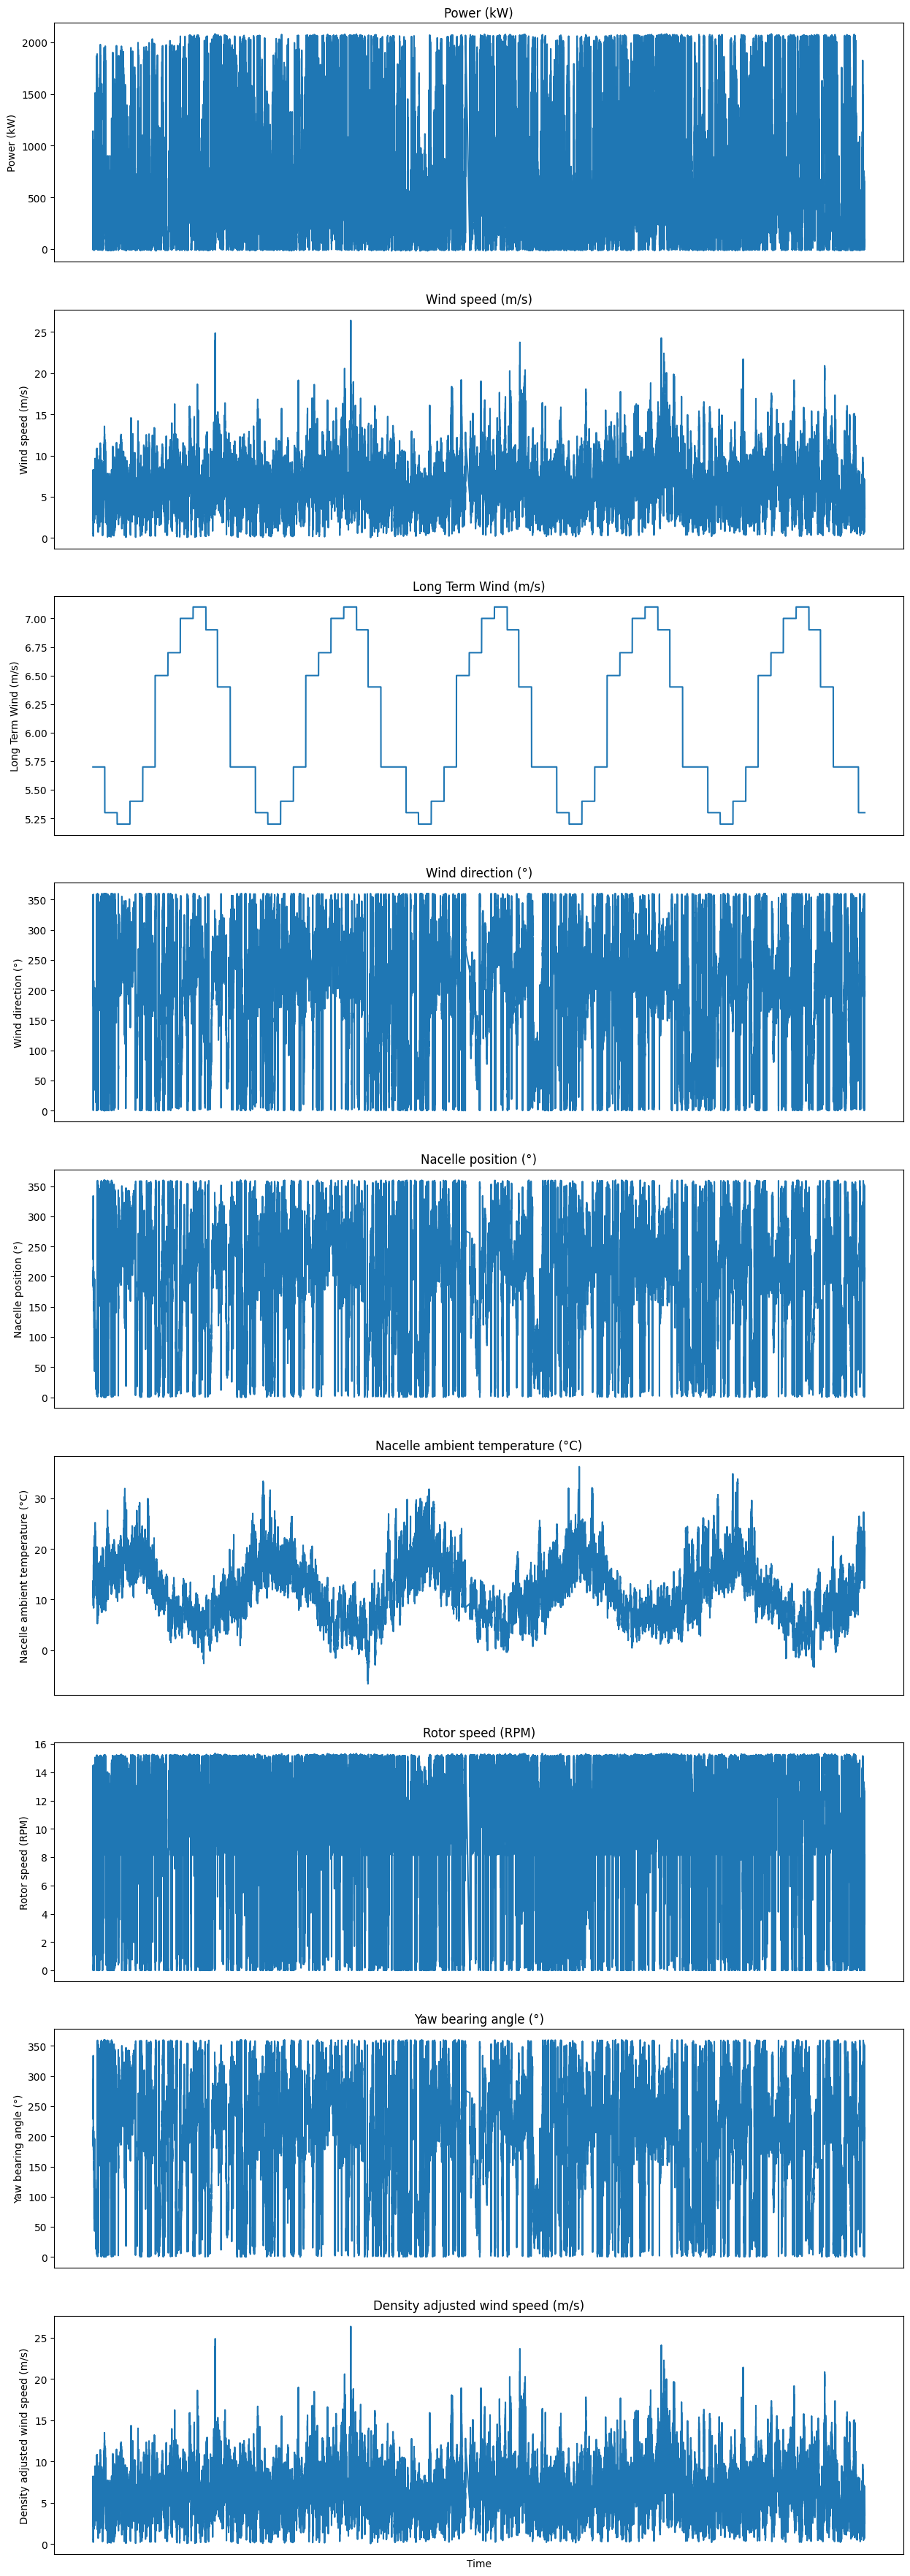

In [7]:
# variables over time
vis.plot_var_over_time(column_name=FEATURES, data=turbine_brit, start_time='2016-01-03', end_time='2021-07-01')

### Correlation plots

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

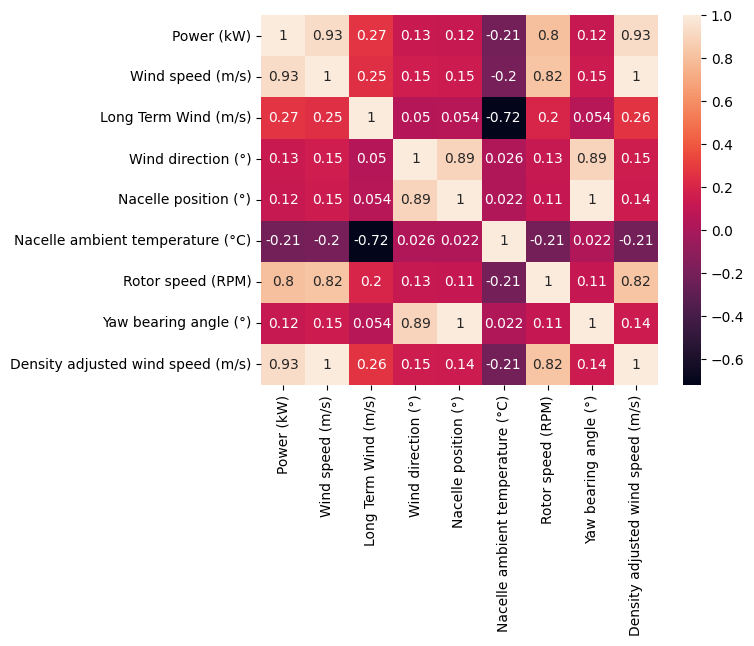

In [9]:
def plot_corr_matrix(data, features):
    corr = data[features].corr()
    fig, ax = plt.subplots()
    sns.heatmap(corr, annot=True, ax=ax)
    plt.show()

plot_corr_matrix(turbine_brit, FEATURES)

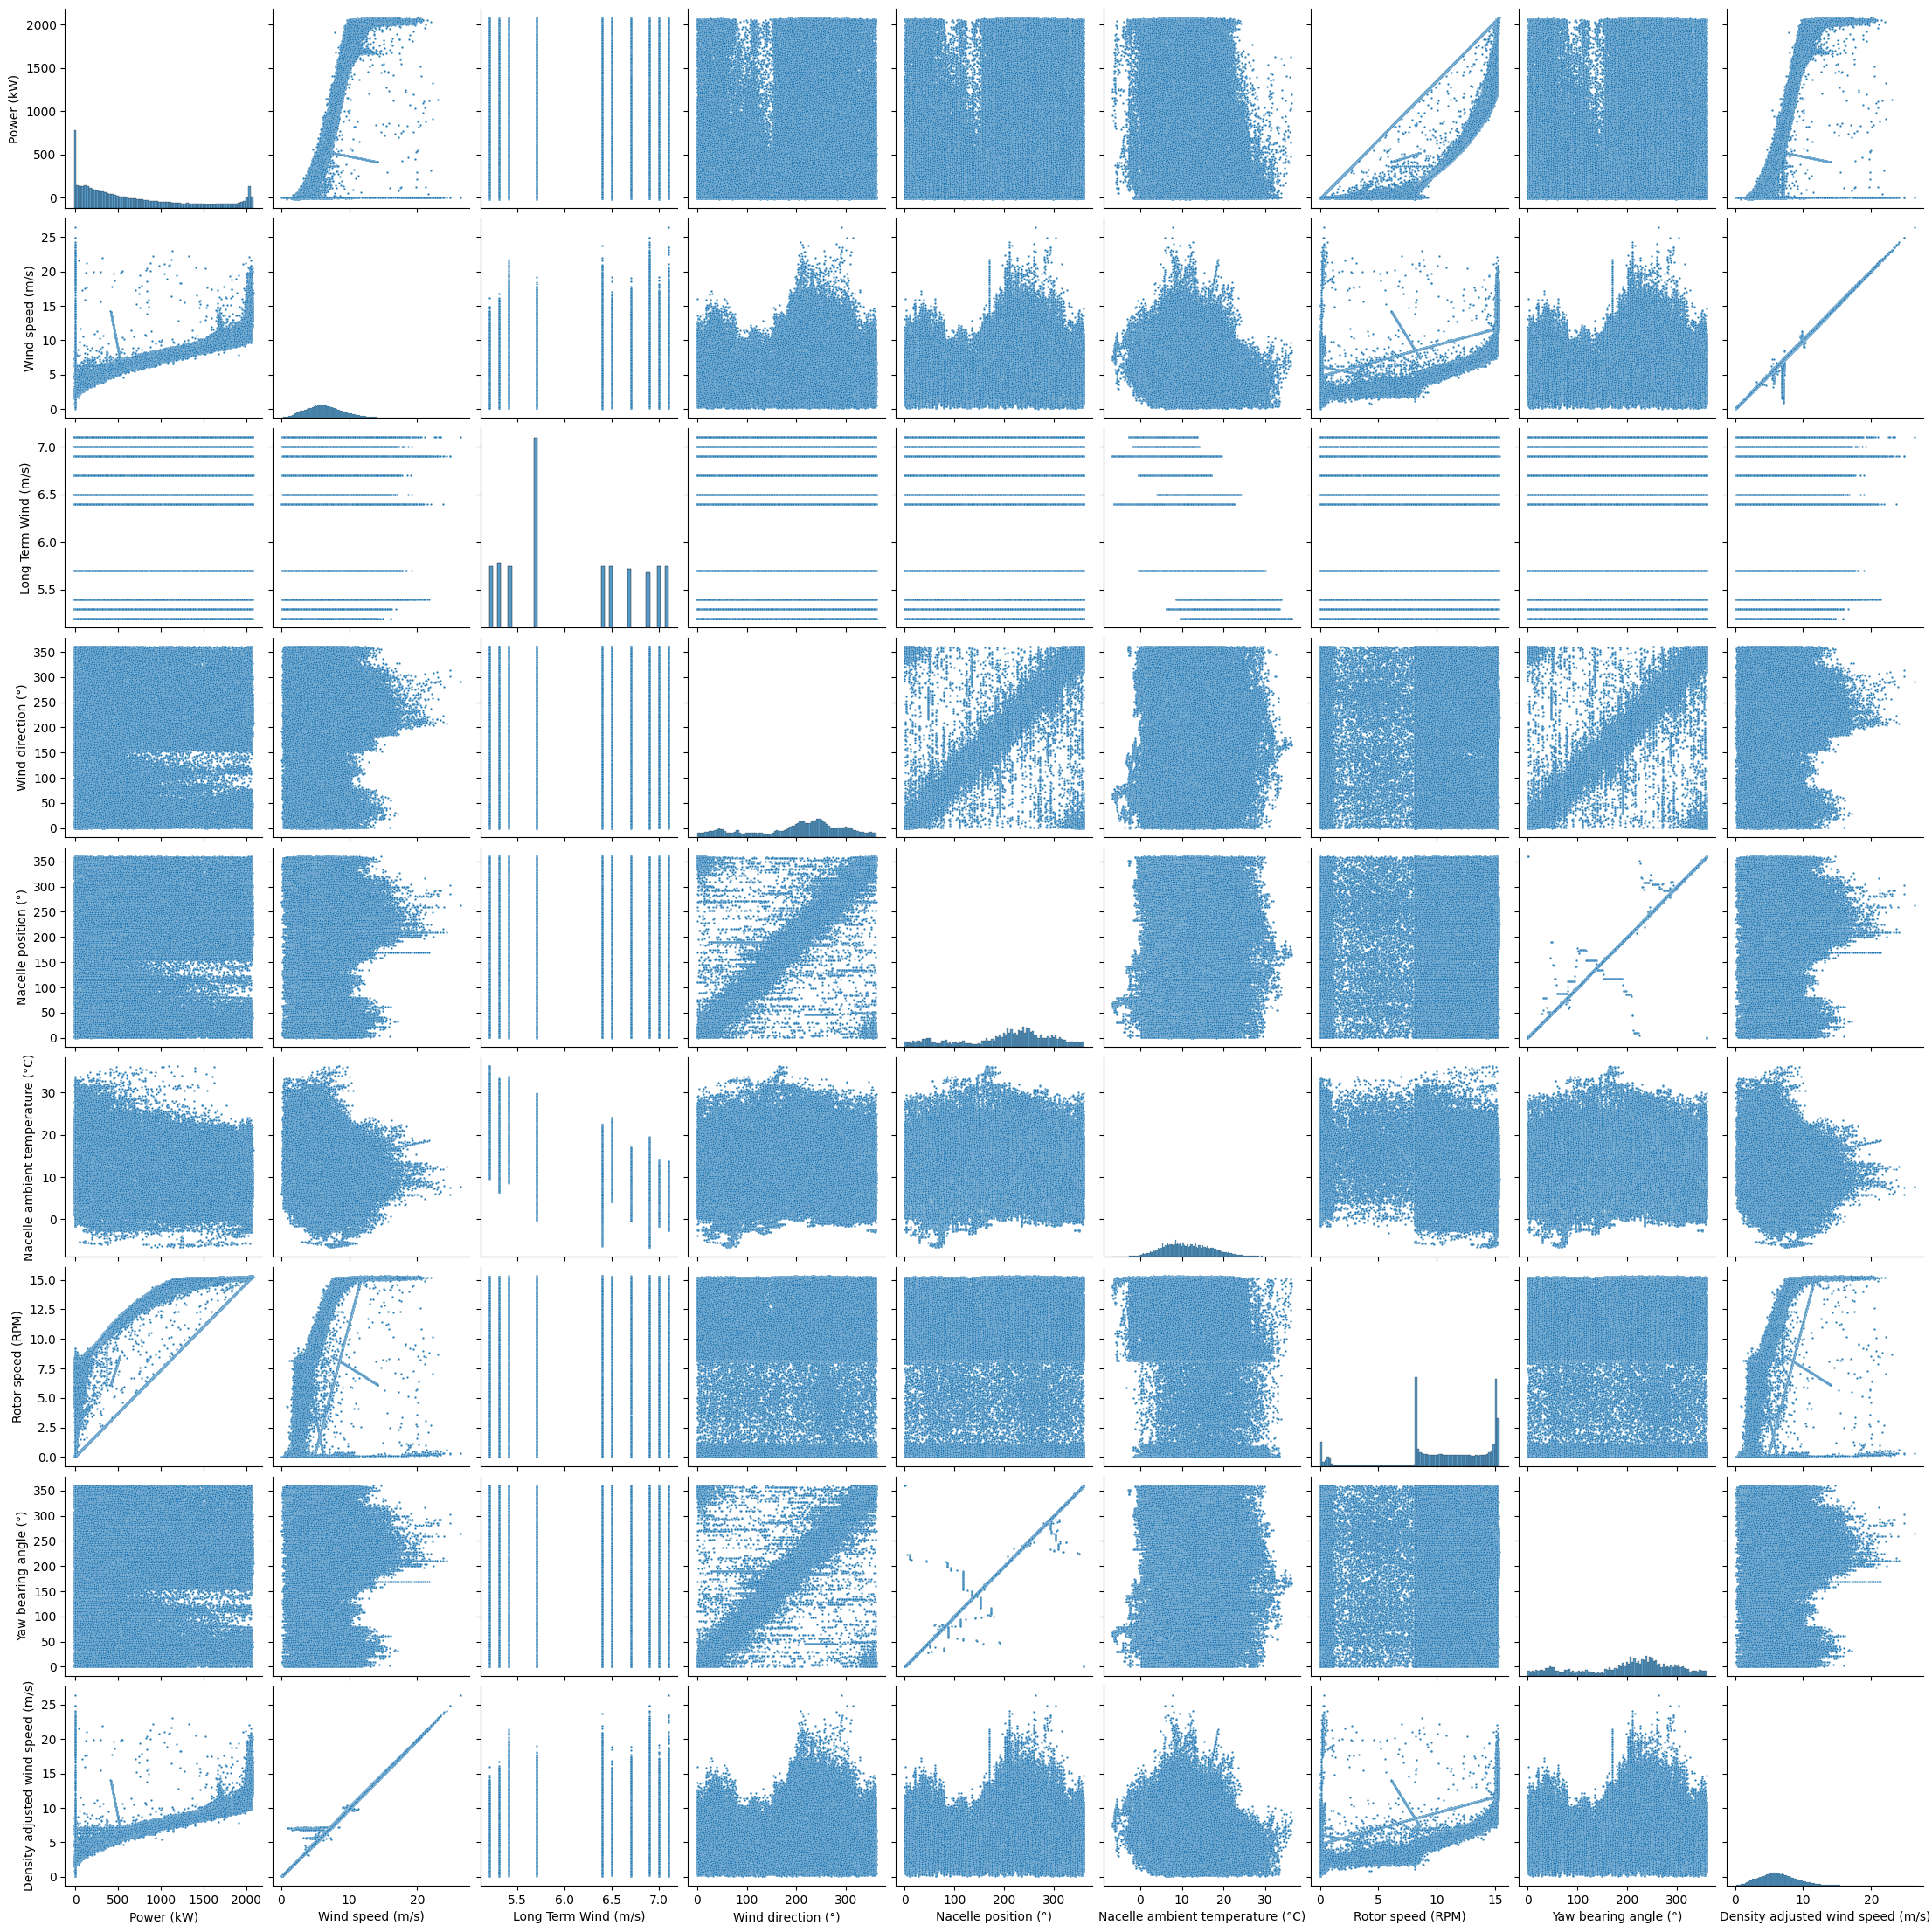

In [10]:
def scatter_plot(data, features):
    sns.pairplot(data[features], plot_kws={"s": 3})
    plt.show()

scatter_plot(turbine_brit, FEATURES)

**Analysis:**

In [11]:
# apply results of analysis

## Save data 

In [12]:
# save data 
turbine_brit.to_csv(f'../data/cleaned/turbine_brit_{TURBINE_ID_BRITISH}.csv')
#turbine_braz.to_csv(f'../data/cleaned/turbine_braz_{TURBINE_ID_BRAZILIAN}.csv')